In [1]:
import sys
sys.path.insert(1, '..') # sets the import path to the parent folder

import time
import datetime
import numpy as np
from matplotlib import pyplot as plt

In [2]:
anti = -1
L = 5
num_trash = 2

name = "jakarta_execute"
filename = '../data/jakarta_execute'

In [3]:
# load data from simulation and experiment

temp = np.load(filename + "_executed_-real-device-True.npz",allow_pickle=True)
gx_list = temp["gx_list"]
gz = 0
gz_list = [0]
Qmag_sim = temp["Qmag_sim"]
QZ_sim = temp["QZ_sim"]

Qmag_device = temp["Qmag_device"]
QZ_device = temp["QZ_device"]

Qen_sim = temp["Qen_sim"]
Sen = temp["Sen"]
Smag = temp["Smag"]
opt_params = temp["opt_params"]
paramss = temp["paramss"]; valuess = temp["valuess"]; countss = temp["countss"]

In [8]:
run1 = np.load(filename + "run1_device2.npz",allow_pickle=True) # alt: run1_device2
sim1 = np.load(filename + "run1_sim2.npz",allow_pickle=True)
run2 = np.load(filename + "run2_device.npz",allow_pickle=True) # alt: _overnight
sim2 = np.load(filename + "run2_sim.npz",allow_pickle=True)

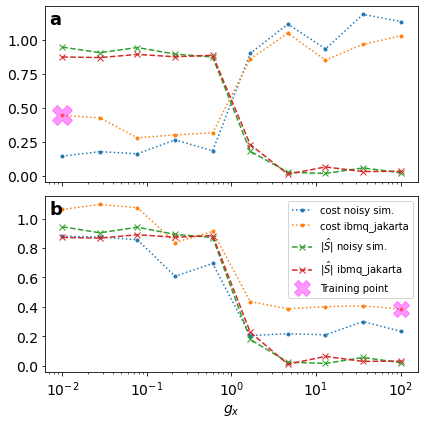

In [9]:
fig, axs = plt.subplots(nrows=2,figsize=(6,6),sharex=True,gridspec_kw={'height_ratios': [2, 2]})
ax = axs[0]
cost_sim = sim1["cost"]
ax.plot(gx_list, cost_sim,".:", label="cost noisy sim.")

cost_device = run1["cost"]
ax.plot(gx_list, cost_device,".:", label="cost ibmq_jakarta")

ax.plot(gx_list, np.abs(Qmag_sim),"x--", label="$|\hat{S}|$ noisy sim.")
ax.plot(gx_list, np.abs(Qmag_device),"x--", label="$|\hat{S}|$ ibmq_jakarta")
ax.set_xscale("log")
ax.plot(gx_list[0],cost_device[0], "X",markersize=20,alpha=0.4,color="magenta")

ax = axs[1]
cost_sim = sim2["cost"]
ax.plot(gx_list, cost_sim,".:", label="cost noisy sim.")

cost_device = run2["cost"]
ax.plot(gx_list, cost_device,".:", label="cost ibmq_jakarta")

ax.plot(gx_list, np.abs(Qmag_sim),"x--", label="$|\hat{S}|$ noisy sim.")
ax.plot(gx_list, np.abs(Qmag_device),"x--", label="$|\hat{S}|$ ibmq_jakarta")
ax.set_xscale("log")
ax.plot(gx_list[-1],cost_device[-1],"X",markersize=16,alpha=0.4,color="magenta", label= "Training point")
for ax in axs:
    ax.tick_params(labelsize=14)
axs[1].legend() #ncol=5
axs[-1].set_xlabel("$g_x$", fontsize=14)

plt.tight_layout()

axs[0].text(0.01,0.9,"a", fontweight="bold", size=18, transform = axs[0].transAxes)
axs[1].text(0.01,0.9,"b", fontweight="bold", size=18, transform = axs[1].transAxes)
plt.savefig("../plots/" + name + "_mainplot.png", bbox_inches='tight')
plt.savefig("../plots/" + name + "_mainplot.pdf", bbox_inches='tight')

In [10]:
run1 = np.load(filename + "run1_device.npz",allow_pickle=True) # alt: run1_device2
sim1 = np.load(filename + "run1_sim.npz",allow_pickle=True)
run2 = np.load(filename + "run2_device_overnight.npz",allow_pickle=True) # alt: run2_device_
sim2 = np.load(filename + "run2_sim.npz",allow_pickle=True)

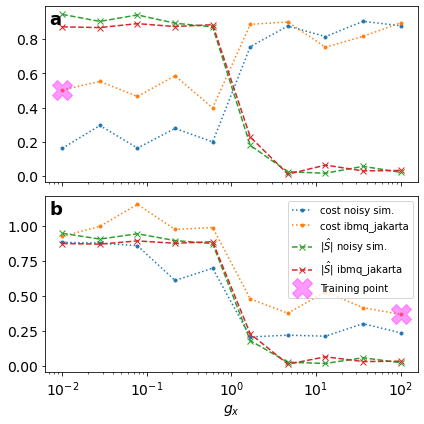

In [11]:
fig, axs = plt.subplots(nrows=2,figsize=(6,6),sharex=True,gridspec_kw={'height_ratios': [2, 2]})
ax = axs[0]
cost_sim = sim1["cost"]
ax.plot(gx_list, cost_sim,".:", label="cost noisy sim.")

cost_device = run1["cost"]
ax.plot(gx_list, cost_device,".:", label="cost ibmq_jakarta")

ax.plot(gx_list, np.abs(Qmag_sim),"x--", label="$|\hat{S}|$ noisy sim.")
ax.plot(gx_list, np.abs(Qmag_device),"x--", label="$|\hat{S}|$ ibmq_jakarta")
ax.set_xscale("log")
ax.plot(gx_list[0],cost_device[0], "X",markersize=20,alpha=0.4,color="magenta")

ax = axs[1]
cost_sim = sim2["cost"]
ax.plot(gx_list, cost_sim,".:", label="cost noisy sim.")

cost_device = run2["cost"]
ax.plot(gx_list, cost_device,".:", label="cost ibmq_jakarta")

ax.plot(gx_list, np.abs(Qmag_sim),"x--", label="$|\hat{S}|$ noisy sim.")
ax.plot(gx_list, np.abs(Qmag_device),"x--", label="$|\hat{S}|$ ibmq_jakarta")
ax.set_xscale("log")
ax.plot(gx_list[-1],cost_device[-1],"X",markersize=20,alpha=0.4,color="magenta", label= "Training point")
for ax in axs:
    ax.tick_params(labelsize=14)
axs[1].legend() #ncol=5
axs[-1].set_xlabel("$g_x$", fontsize=14)

plt.tight_layout()

axs[0].text(0.01,0.9,"a", fontweight="bold", size=18, transform = axs[0].transAxes)
axs[1].text(0.01,0.9,"b", fontweight="bold", size=18, transform = axs[1].transAxes)
plt.savefig("../plots/" + name + "_mainplot_alt.png", bbox_inches='tight')
plt.savefig("../plots/" + name + "_mainplot_alt.pdf", bbox_inches='tight')

Note that here in run1 (upper panel a), the anomaly syndrome circuit was not optimized again for the real device but instead just used the parameters from the noisy simulation.